# Part I

## Описание

В проекте будет использоваться простая архитектура нейронной сети с
использованием библиотеки KERAS. Датасет представлен REUTERS, который ранее
не использовался в программе обучения. Решается задача классификации с количеством классов равным 46, т.е. имеется столько же тем (топиков) и как минимум 10 примеров по каждой теме представлены в обучающей выборке.

## Основная часть

In [1]:
from keras.datasets import reuters

In [2]:
# импортируем основные библиотеки
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.utils import to_categorical

In [3]:
# ограничимся 10.000 самыми частотными словами
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

In [4]:
word_index = reuters.get_word_index()

In [5]:
# посмотрим на содержание
l = []
for i in word_index:
    l.append(i)
l[:10]

['mdbl',
 'fawc',
 'degussa',
 'woods',
 'hanging',
 'localized',
 'sation',
 'chanthaburi',
 'refunding',
 'hermann']

In [6]:
x_train.shape

(8982,)

In [7]:
x_test.shape

(2246,)

In [8]:
# представим слова в виде векторов
def vectorize(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1.
 return results
x_train = vectorize(x_train) 
x_test = vectorize(x_test)

In [9]:
# представим также лейблы в векторном виде
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
  results[i, label] = 1.
 return results
y_train = to_one_hot(y_train) 
y_test = to_one_hot(y_test)

In [10]:
# выделим проверочный набор
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [11]:
# создадим конфигурацию сети
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
# компиляция с выбранными optimizer, функцией потерь и метрикой качества
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [13]:
# собственно само обучение
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=100,
 batch_size=250,
 validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 2s 37ms/step - loss: 1.9078 - accuracy: 0.6027 - val_loss: 1.2845 - val_accuracy: 0.7040
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 1.0112 - accuracy: 0.7794 - val_loss: 1.0328 - val_accuracy: 0.7750
Epoch 3/100
32/32 [==============================] - 1s 20ms/step - loss: 0.6903 - accuracy: 0.8569 - val_loss: 0.9058 - val_accuracy: 0.8090
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4813 - accuracy: 0.9054 - val_loss: 0.8904 - val_accuracy: 0.8020
Epoch 5/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3515 - accuracy: 0.9318 - val_loss: 0.8529 - val_accuracy: 0.8210
Epoch 6/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2656 - accuracy: 0.9442 - val_loss: 0.8504 - val_accuracy: 0.8180
Epoch 7/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2101 - accuracy: 0.9508 - val_loss: 0.8947 - val_accuracy: 0.8210
Epoch 

32/32 [==============================] - 1s 20ms/step - loss: 0.0536 - accuracy: 0.9619 - val_loss: 1.3281 - val_accuracy: 0.7750
Epoch 59/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0552 - accuracy: 0.9620 - val_loss: 1.3097 - val_accuracy: 0.7860
Epoch 60/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0538 - accuracy: 0.9622 - val_loss: 1.3533 - val_accuracy: 0.7730
Epoch 61/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0542 - accuracy: 0.9619 - val_loss: 1.2936 - val_accuracy: 0.7840
Epoch 62/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0537 - accuracy: 0.9605 - val_loss: 1.3433 - val_accuracy: 0.7710
Epoch 63/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0536 - accuracy: 0.9628 - val_loss: 1.3379 - val_accuracy: 0.7800
Epoch 64/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0531 - accuracy: 0.9635 - val_loss: 1.3488 - val_accuracy: 0.7790
Epoch 65/100

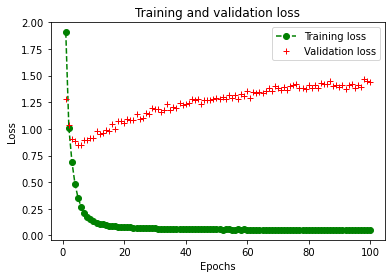

In [14]:
# визуализация потерь 
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'go--', label='Training loss')
plt.plot(epochs, val_loss, 'r+', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# оцениваем
results = model.evaluate(x_test, y_test)
print(results)

71/71 [==============================] - 0s 3ms/step - loss: 1.7389 - accuracy: 0.7551
[1.7388598918914795, 0.7551202178001404]


In [16]:
# предсказываем
predictions = model.predict(x_test)
print(predictions)

71/71 [==============================] - 0s 3ms/step
[[8.0265809e-06 1.9504567e-05 5.0529152e-06 ... 1.5937543e-05
  7.2798340e-10 5.3233522e-05]
 [1.0162386e-02 4.6578074e-01 1.2953255e-03 ... 8.0759355e-06
  4.4971384e-06 1.7989268e-04]
 [4.6315561e-03 7.8786105e-01 4.8434988e-04 ... 3.9598686e-07
  1.1024639e-08 1.0857726e-04]
 ...
 [5.3217974e-07 2.3803888e-05 2.5964509e-05 ... 1.6735426e-06
  2.2188347e-10 1.3698218e-06]
 [4.2977526e-06 3.9291091e-04 1.0259359e-05 ... 2.0544317e-07
  3.5318866e-09 2.4108485e-06]
 [5.2017938e-05 6.8945050e-01 4.5988355e-03 ... 1.0738537e-04
  3.0120026e-07 1.1546534e-05]]


## Замечания

Эксперементально были подобраны гиперпараметры, которые увеличивали предска
зательную силу нейросети: в частности углубили сеть, увеличили количество 
эпох обучения, остановились на выбранном оптимайзере. Чтобы сберечь ресурсы 
машины также увеличили batch_size.

# Part II

Нейро́нная сеть Хо́пфилда — полносвязная нейронная сеть с симметричной матрицей
связей. Некоторые авторы относят сеть Хопфилда к обучению без учителя. В процессе работы динамика таких сетей сходится к одному из положений
равновесия. Такая сеть может быть использована как автоассоциативная память,
как фильтр, а также для решения некоторых задач оптимизации.

Сеть Хопфилда однослойная и состоит из
N искусственных нейронов. Каждый нейрон системы может принимать на входе
и на выходе одно из двух состояний (что аналогично выходу нейрона с пороговой
функцией активации):

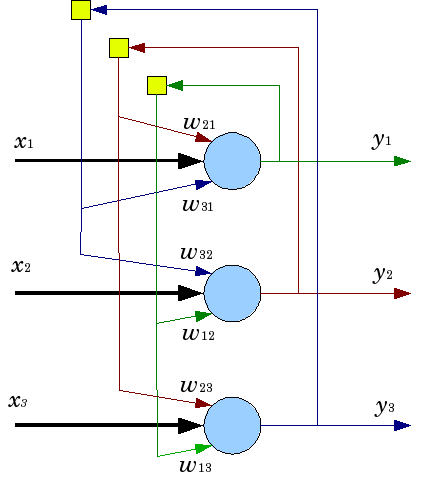

Каждый нейрон связан со всеми остальными нейронами. Взаимодействие нейронов
сети описывается выражением:


Обучение сети заключается в том, что находятся веса матрицы взаимодействий так,
чтобы запомнить несколько векторов (эталонных образов, составляющих "память"
системы). Запоминаемые векторы должны иметь бинарный вид. Расчёт весовых коэффициентов проводится по следующей формуле:

где N — размерность векторов, m — число запоминаемых выходных векторов, 
d — номер запоминаемого выходного вектора, 
Xij — i-я компонента запоминаемого выходного j-го вектора.

Алгоритм обучения сети Хопфилда существенно отличается от таких классических
алгоритмов обучения перцептронов, как метод коррекции ошибки или метод
обратного распространения ошибки. Отличие заключается в том, что вместо
последовательного приближения к нужному состоянию с вычислением ошибок,
все коэффициенты матрицы рассчитываются по одной формуле, за один цикл,
после чего сеть сразу готова к работе.

Как только веса заданы, обученная сеть становится способной "распознавать" 
входные сигналы - то есть, определять, к какому из запомненных образцов
они относятся. Входной вектор проходит некоторое количество итераций до
достижения сходимости. При этом должны распознаваться частично
искажённые или неполные образцы. На вход сети сначала придают значения
исходного вектора (поэтому обозначение на схеме сети входных синапсов в явном
виде носит чисто условный характер).

Для сети Хопфилда могут существовать две модификации, отличающиеся по времени
передачи сигнала: асинхронный и синхронный режимы. Практически используется
только асинхронный режим.

Пример восстановления повреждённого изображения:
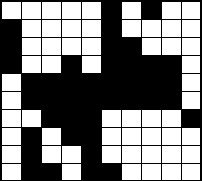


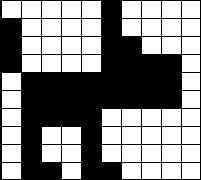

Задачу коммивояжера с помощью нейронной сети Хопфилда решить в общем виде нельзя. Сеть Хопфилда может использоваться для решения подзадачи коммивояжера (нужно обойти все n городов и вернуться в исходный так, чтобы длина пройденного маршрута была минимальной). 

К сожалению, у нейронной сети Хопфилда есть ряд недостатков.
1. Относительно небольшой объём памяти, величину которого можно оценить
выражением:


2. Достижение устойчивого состояния не гарантирует правильный ответ сети.
Это происходит из-за того, что сеть может сойтись к так называемым ложным
аттракторам, иногда называемым «химерами» (как правило, химеры склеены из
фрагментов различных образов).